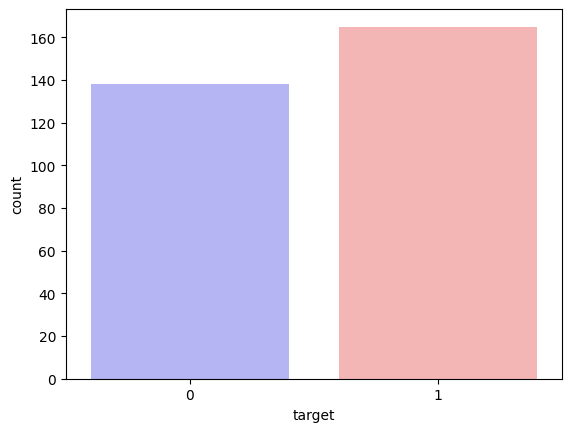

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


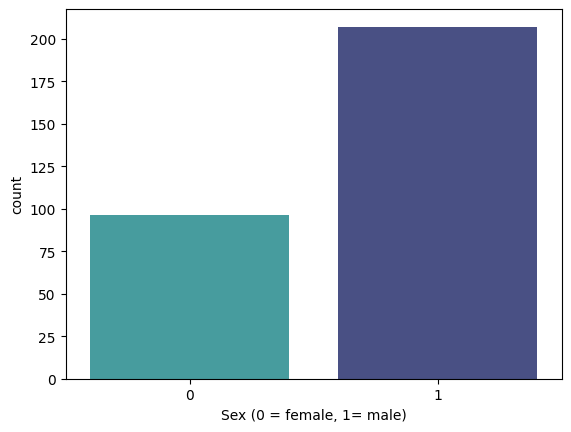

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


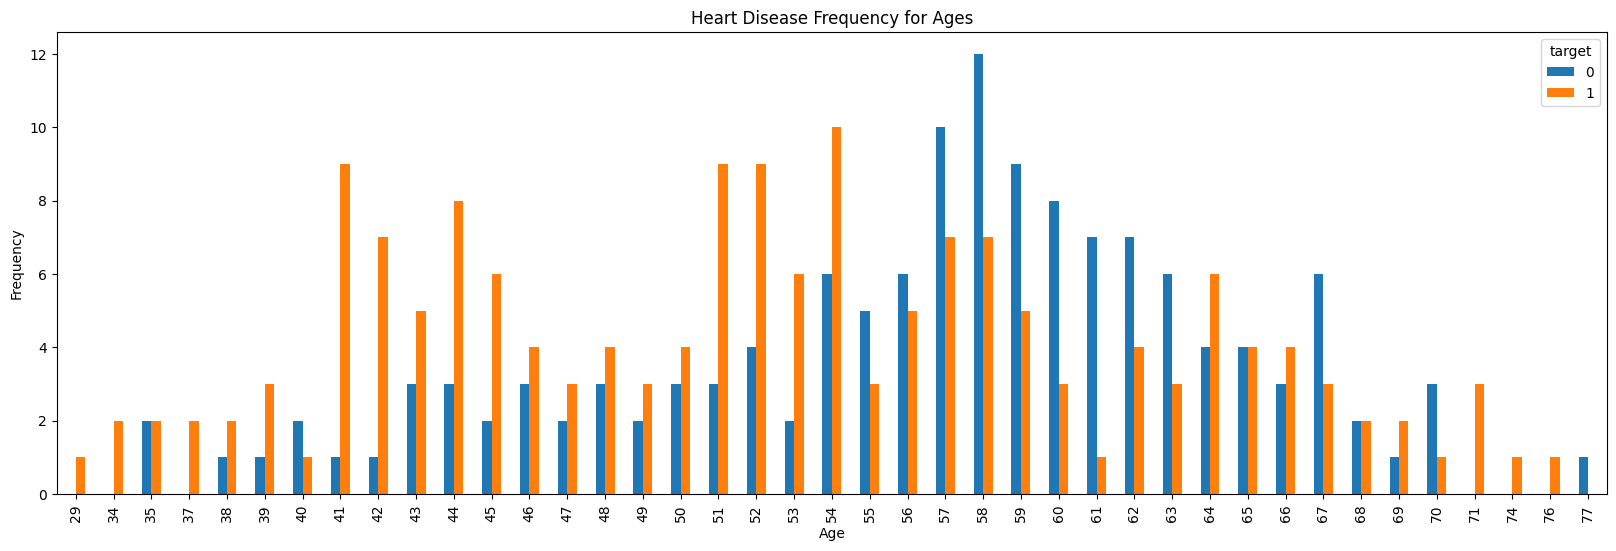

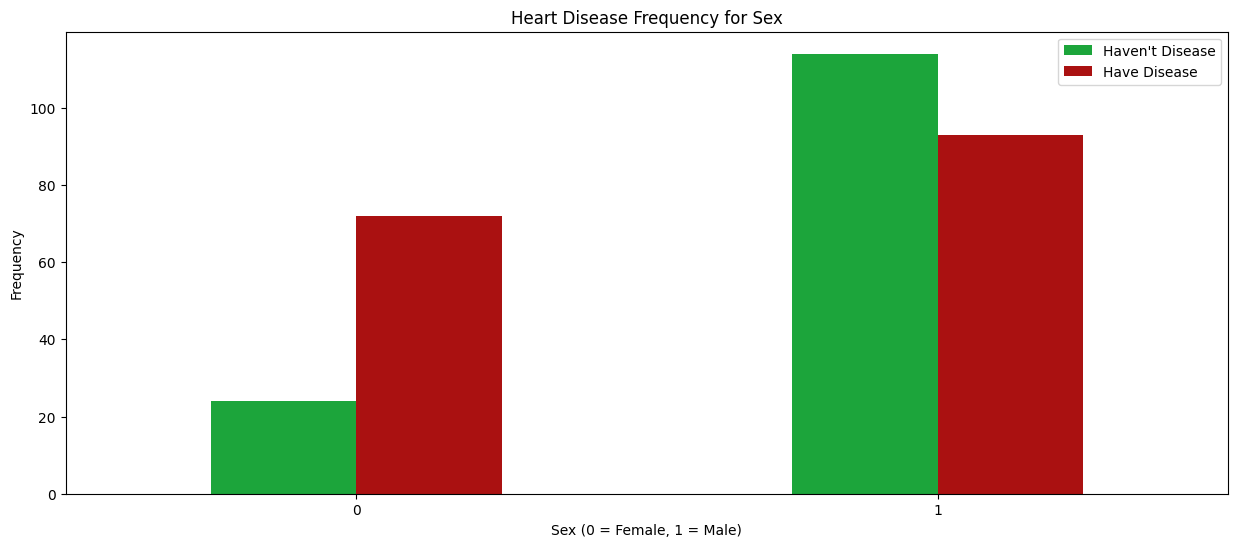

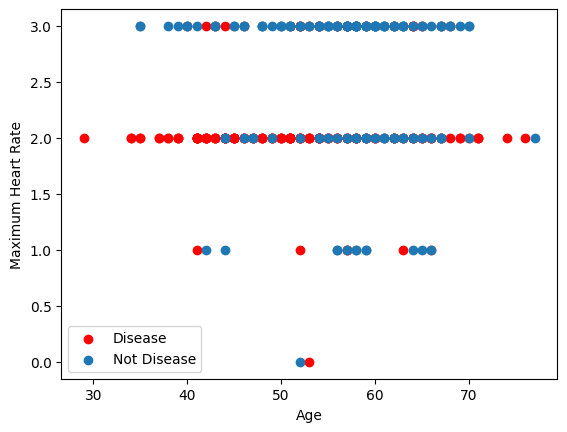

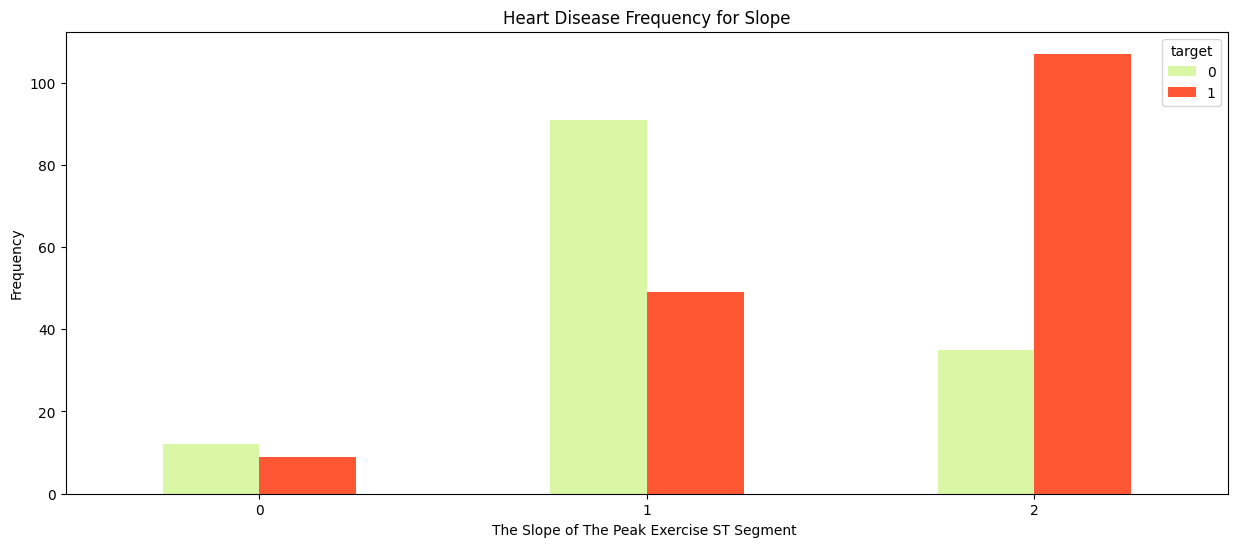

iteration: 100
cost: 0.3618249360805977


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


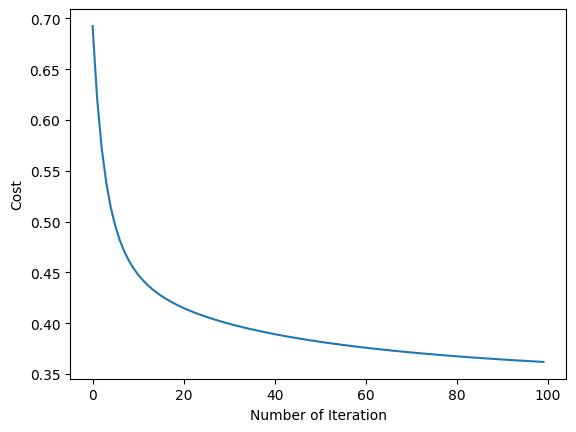

Manuel Test Accuracy: 83.61%
Test Accuracy 85.25%
2 NN Score: 80.33%


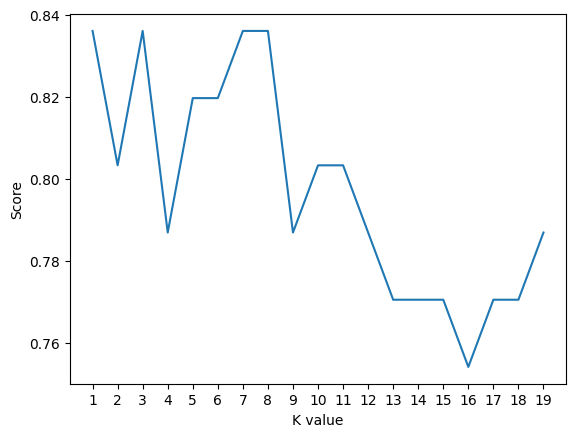

Maximum KNN Score is 83.61%
Test Accuracy of SVM Algorithm: 86.89%
Accuracy of Naive Bayes: 85.25%
Decision Tree Test Accuracy 77.05%
Random Forest Algorithm Accuracy Score : 85.25%


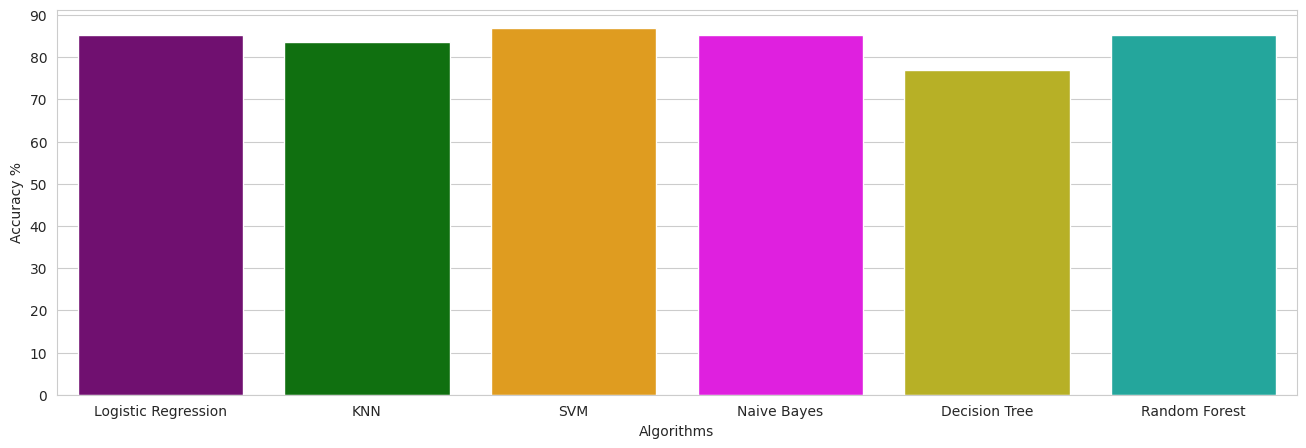

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


extraction_directory = "heart"
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

# First 5 rows of our data
df.head()
df.target.value_counts()

sns.countplot(x="target", data=df, palette="bwr")
plt.show()

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

df.groupby('target').mean()

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

plt.scatter(x=df.age[df.target==1], y=df.thal[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thal[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

#pd.crosstab(df.fasting_blood_sugar,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
#plt.title('Heart Disease Frequency According To FBS')
#plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
#plt.xticks(rotation = 0)
#plt.legend(["Haven't Disease", "Have Disease"])
#plt.ylabel('Frequency of Disease or Not')
#plt.show()

#pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
#plt.title('Heart Disease Frequency According To Chest Pain Type')
#plt.xlabel('Chest Pain Type')
#plt.xticks(rotation = 0)
#plt.ylabel('Frequency of Disease or Not')
#plt.show()

#a = pd.get_dummies(df['chest_pain_type'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df,b, c]
df = pd.concat(frames, axis = 1)
df.head()

#df = df.drop(columns = ['chest_pain_type', 'thal', 'slope'])
df.head()

#creaating model using logistic regression
y = df.target.values
x_data = df.drop(['target'], axis = 1)

# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#initialize
def initialize(dimension):

    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

def sigmoid(z):

    y_head = 1/(1+ np.exp(-z))
    return y_head

#By the way in formulas;

#h0(x^i)= y_head
#y^i = y_train
#x^i = x_train
def forwardBackward(weight,bias,x_train,y_train):
    # Forward

    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]

    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}

    return cost,gradients

def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []

    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}

    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)

    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

logistic_regression(x_train,y_train,x_test,y_test,1,100)

accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

# KNN
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

#SVM
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming df contains your dataset with features and target 'target' column
# Separate features (x) and target label (y)
x = df.drop('target', axis=1)  # Assuming 'target' is the column for labels
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes of your data to ensure consistency
print("Shapes - x_train:", x_train.shape, "y_train:", y_train.shape, "x_test:", x_test.shape, "y_test:", y_test.shape)

# Convert DataFrames to numpy arrays
x_train_array = x_train.to_numpy()
x_test_array = x_test.to_numpy()
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

# Reshape the data for LSTM input: (samples, time_steps, features)
x_train_rnn = np.reshape(x_train_array, (x_train_array.shape[0], 1, x_train_array.shape[1]))
x_test_rnn = np.reshape(x_test_array, (x_test_array.shape[0], 1, x_test_array.shape[1]))

# Define the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(1, x_train_array.shape[1])),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_rnn, y_train_array, epochs=70, batch_size=32, validation_data=(x_test_rnn, y_test_array))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_rnn, y_test_array)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Shapes - x_train: (242, 20) y_train: (242,) x_test: (61, 20) y_test: (61,)
Epoch 1/70
8/8 [==============================] - 10s 109ms/step - loss: 0.7192 - accuracy: 0.4752 - val_loss: 0.6283 - val_accuracy: 0.6230
Epoch 2/70
8/8 [==============================] - 0s 13ms/step - loss: 0.6596 - accuracy: 0.6033 - val_loss: 0.5880 - val_accuracy: 0.7541
Epoch 3/70
8/8 [==============================] - 0s 10ms/step - loss: 0.6377 - accuracy: 0.6240 - val_loss: 0.5661 - val_accuracy: 0.7213
Epoch 4/70
8/8 [==============================] - 0s 10ms/step - loss: 0.6298 - accuracy: 0.6446 - val_loss: 0.5635 - val_accuracy: 0.7541
Epoch 5/70
8/8 [==============================] - 0s 13ms/step - loss: 0.6253 - accuracy: 0.6446 - val_loss: 0.5453 - val_accuracy: 0.8033
Epoch 6/70
8/8 [==============================] - 0s 15ms/step - loss: 0.6149 - accuracy: 0.6653 - val_loss: 0.5286 - val_accuracy: 0.8197
Epoch 7/70
8/8 [==============================] - 0s 12ms/step - loss: 0.6076 - accuracy:

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

# Assuming 'target' is your target variable
y = df['target']
x = df.drop(['target'], axis=1)

# Normalize the features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Convert y_train to a NumPy array
y_train = y_train.to_numpy().reshape(-1, 1)

# Get input_dim from the shape of x_train
input_dim = x_train.shape[1]

# Initialize model
model = Sequential()

# Add layers
model.add(Dense(64, input_dim=input_dim, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(8, activation='relu'))  # Use softmax for multi-class classification
model.add(Dropout(0.20))

model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile model
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Summary
model.summary()

# Fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                896       
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 8)                

In [23]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


2/2 [==============================] - 0s 10ms/step - loss: 0.3628 - accuracy: 0.8852
Test Accuracy: 88.52%


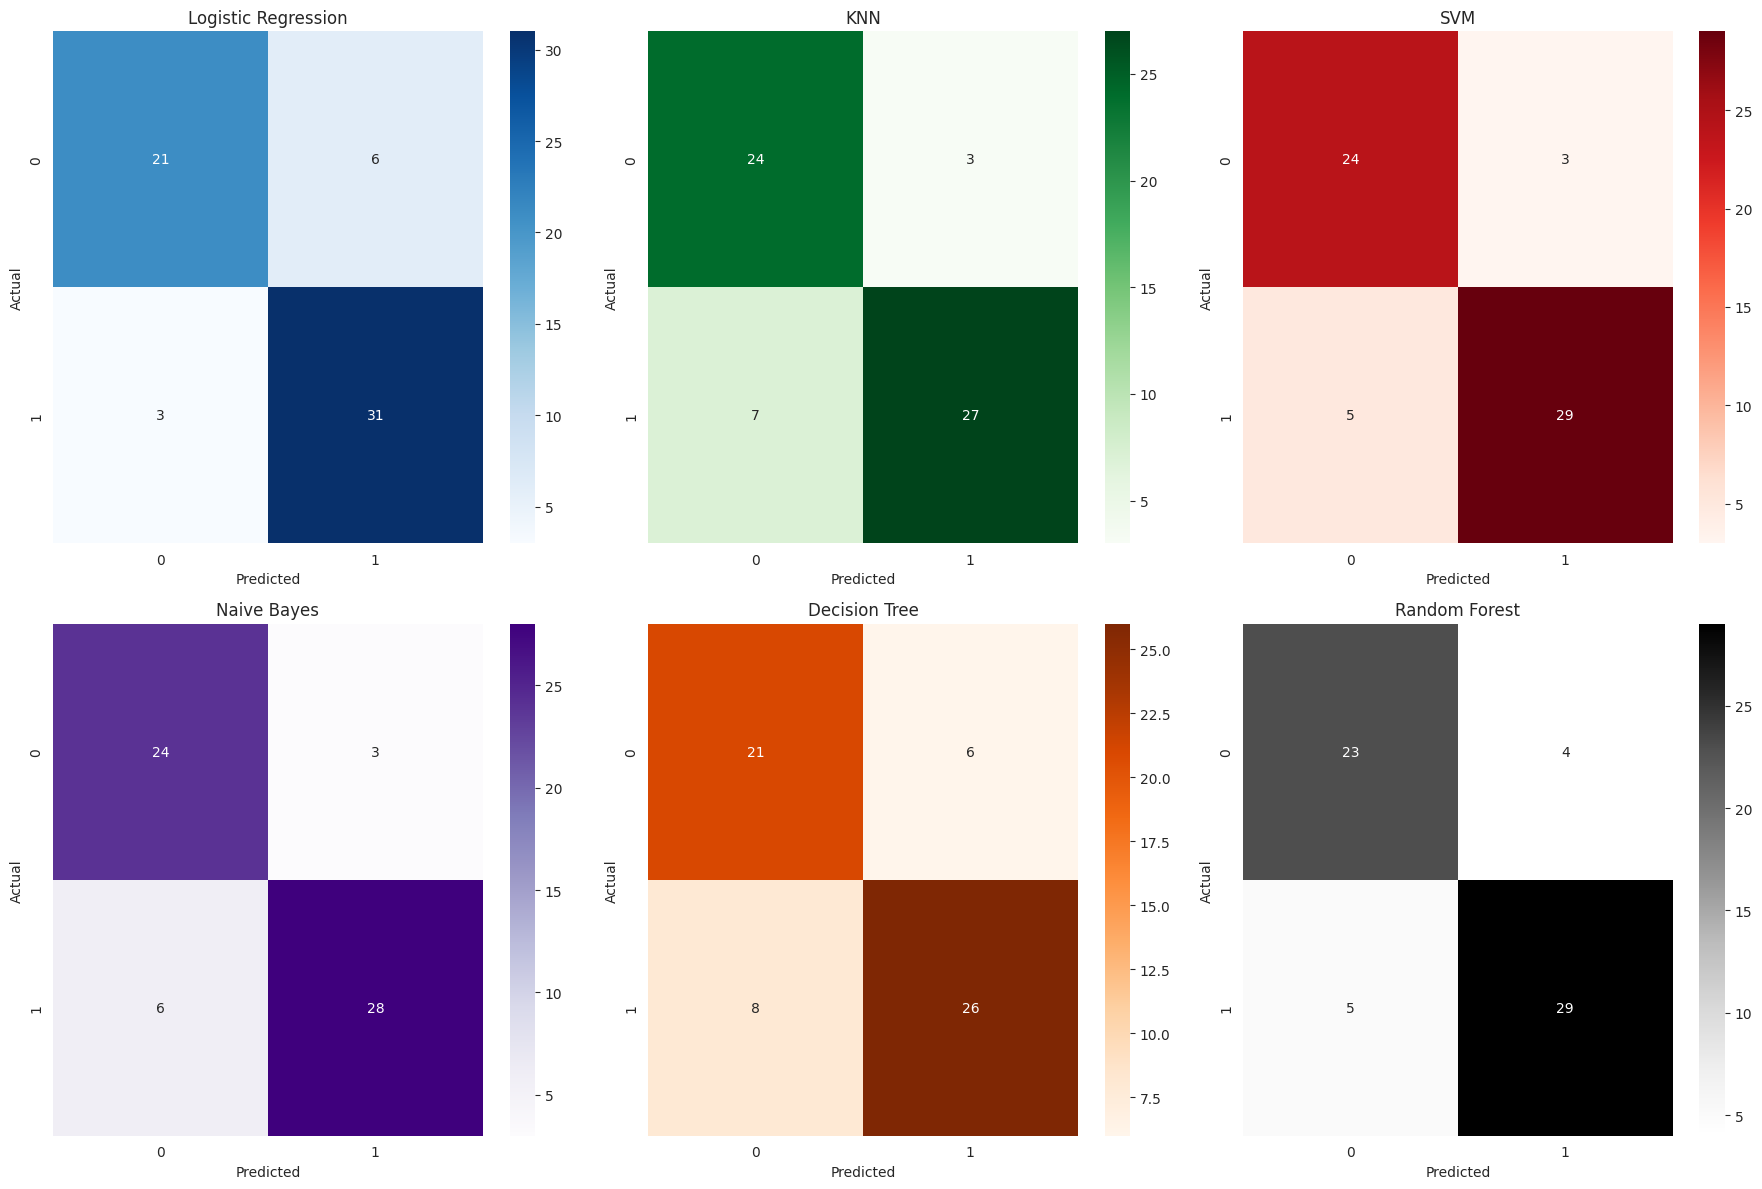

In [15]:
# Plotting Confusion Matrices with Different Colors
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Define different color maps
cmaps = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'Greys']

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap=cmaps[0], ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap=cmaps[1], ax=axes[0, 1])
axes[0, 1].set_title('KNN')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap=cmaps[2], ax=axes[0, 2])
axes[0, 2].set_title('SVM')
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('Actual')

# Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap=cmaps[3], ax=axes[1, 0])
axes[1, 0].set_title('Naive Bayes')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Decision Tree
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap=cmaps[4], ax=axes[1, 1])
axes[1, 1].set_title('Decision Tree')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=cmaps[5], ax=axes[1, 2])
axes[1, 2].set_title('Random Forest')
axes[1, 2].set_xlabel('Predicted')
axes[1, 2].set_ylabel('Actual')



plt.tight_layout()
plt.show()


In [20]:
# Predict probabilities using the model
y_pred_probs = model.predict(x_test)
# Convert probabilities to binary classes
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)




2/2 [==============================] - 0s 5ms/step


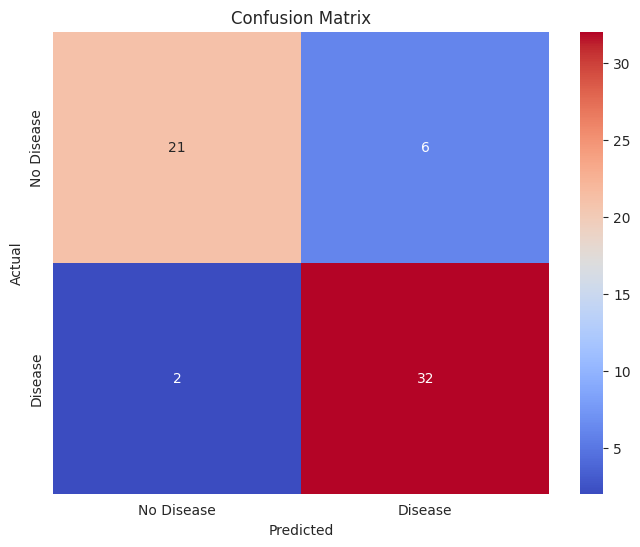

In [21]:
# Plot confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
